## Added required Libraries

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

## Reading data from csv file

In [46]:
data = pd.read_csv('./Heart _Diseases/heart.csv')

## Counting data

In [47]:
age_counts = data.groupby('age').size()
ages = age_counts.index
people = age_counts.values

bp_counts = data.groupby('trestbps').size()
bps = bp_counts.index
bp_people = bp_counts.values

## Plotting age vs people

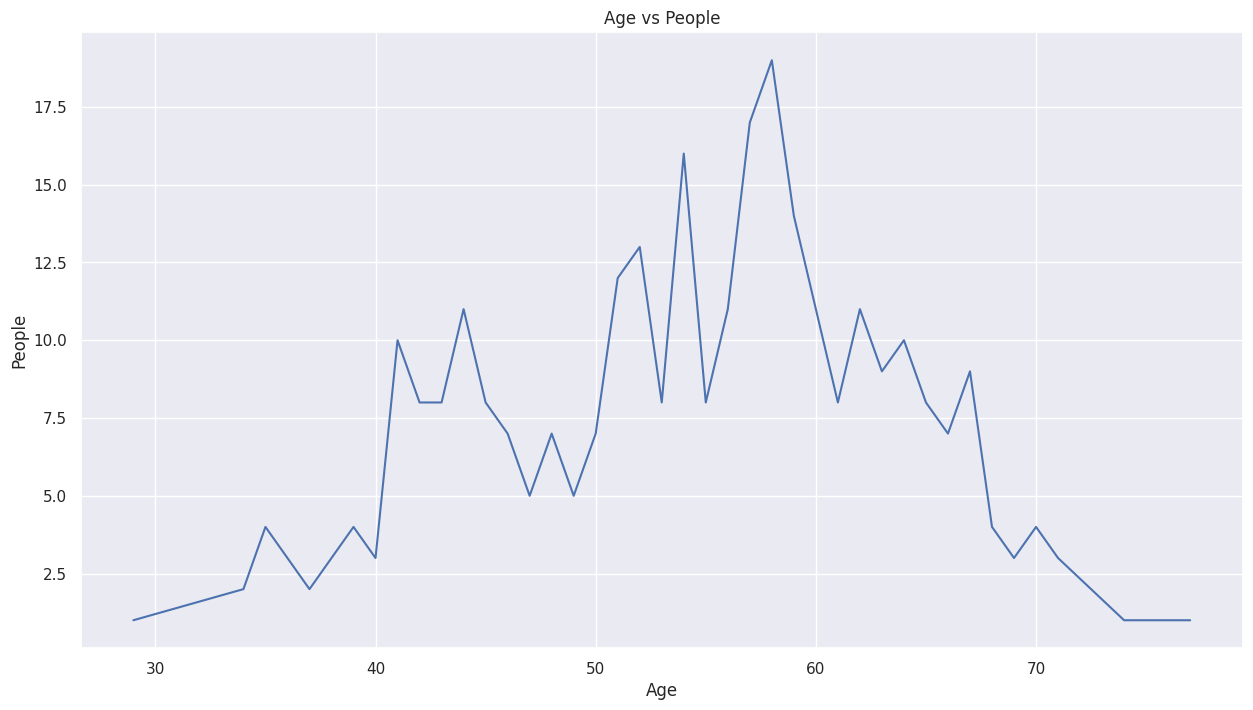

In [48]:
plt.plot(ages, people)
plt.xlabel('Age')
plt.ylabel('People')
plt.title('Age vs People')
plt.show()

## Plotting Blood Pressure vs Age

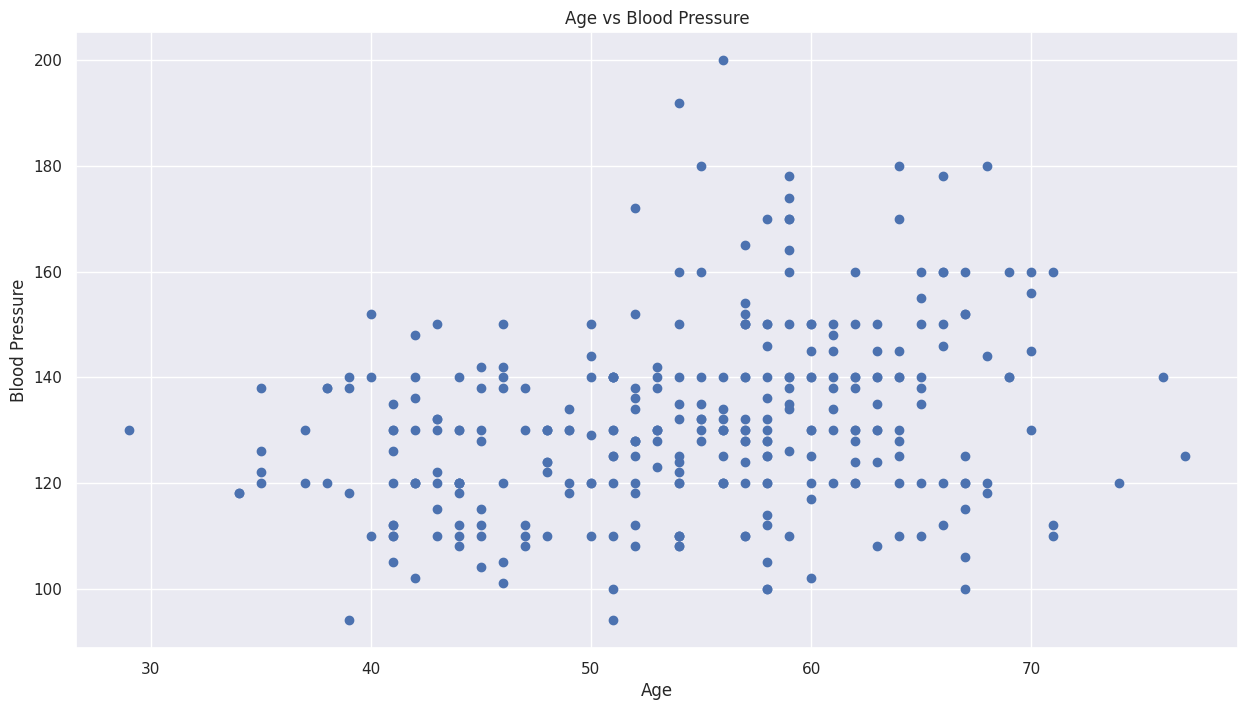

In [49]:
plt.scatter(data['age'], data['trestbps'])
plt.xlabel('Age')
plt.ylabel('Blood Pressure')
plt.title('Age vs Blood Pressure')
plt.show()

## Plotting sex vs people

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


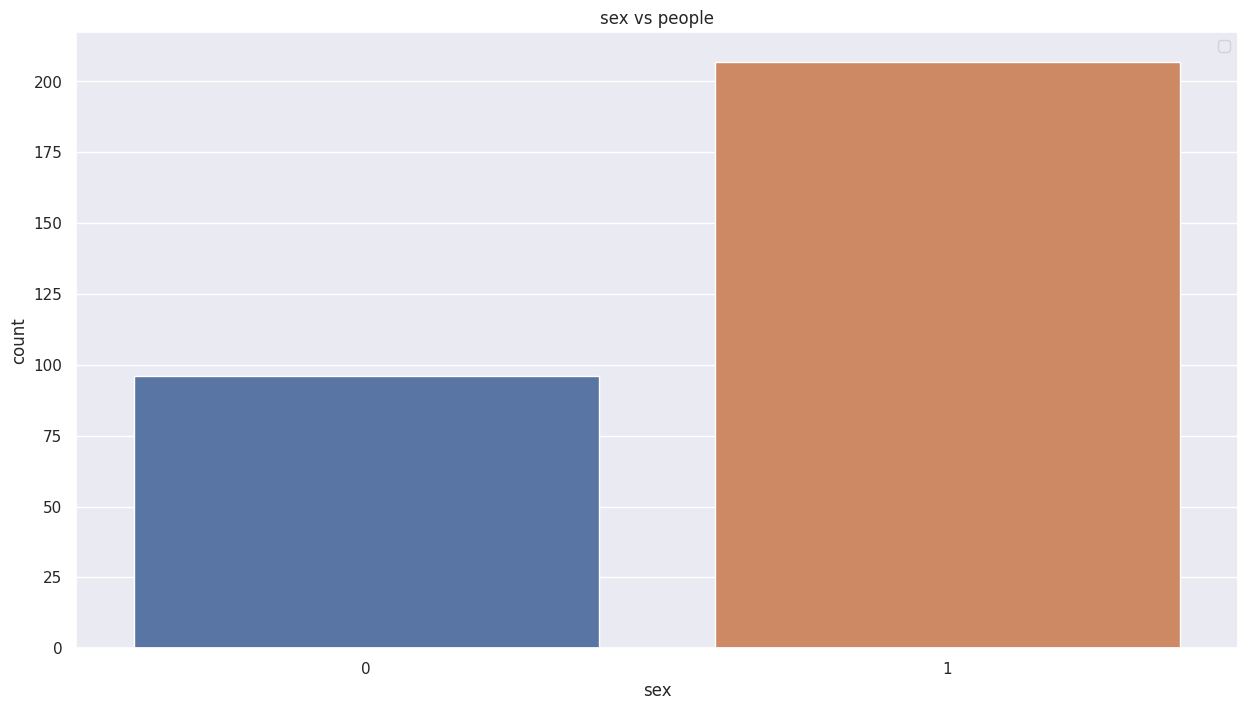

In [50]:
sns.countplot(x='sex', data=data)
xlabel='sex'
plt.title('sex vs people')

## Plotting cp vs people

Text(0.5, 1.0, 'cp vs people')

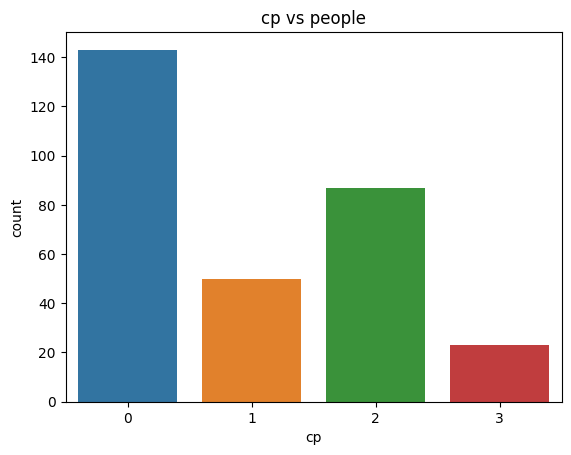

In [6]:
sns.countplot(x='cp', data=data)
xlabel='cp'
plt.title('cp vs people')


## Plotting in pair Blood Pressure vs Cholesterol vs Blood Sugar vs Maximum Heart Rate, Exercise Angina

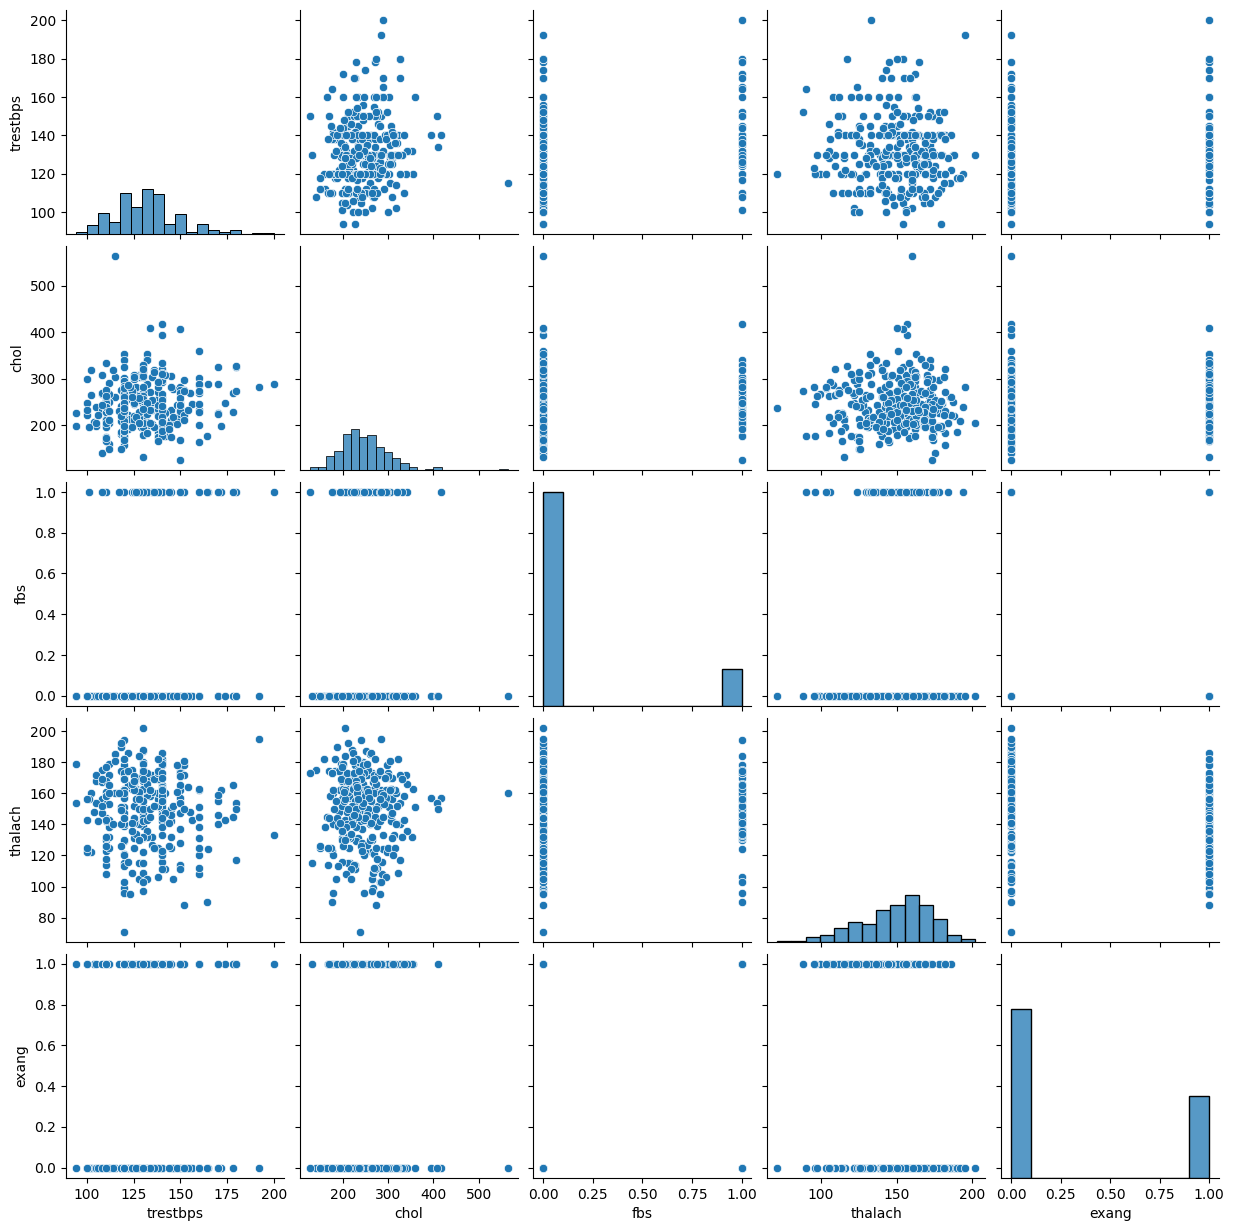

In [7]:
sns.pairplot(data, vars=['trestbps', 'chol', 'fbs', 'thalach', 'exang'])

## Adding Test Split for training and testing

In [9]:
predictors = data[['age', 'sex', 'cp', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca' ]]
target = data["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)


## Logistic Regression Method of Machine Learning

In [10]:
lr = LogisticRegression()

lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)

score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 80.33 %


/home/destructor9804/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Gaussian Naive Bayes Method of Machine Learning

In [11]:
nb = GaussianNB()

nb.fit(X_train,Y_train)

Y_pred_nb = nb.predict(X_test)

score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 81.97 %


## Support Vector Machine Method of Machine Learning

In [12]:
sv = svm.SVC(kernel='linear')

sv.fit(X_train, Y_train)

Y_pred_svm = sv.predict(X_test)

score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 81.97 %


## K Nearest Neighbors Method of Machine Learning

In [13]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)

score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 67.21 %


## Decision Tree Method of Machine Learning

In [14]:
max_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)

score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 78.69 %


## Random Forest Method of Machine Learning

In [15]:
max_accuracy = 0

for x in range(2000):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)

score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_rf)+" %")

The accuracy score achieved using Decision Tree is: 86.89 %


## Comparison plot of accuracy of all methods

<Axes: xlabel='algorithm', ylabel='accuracy'>

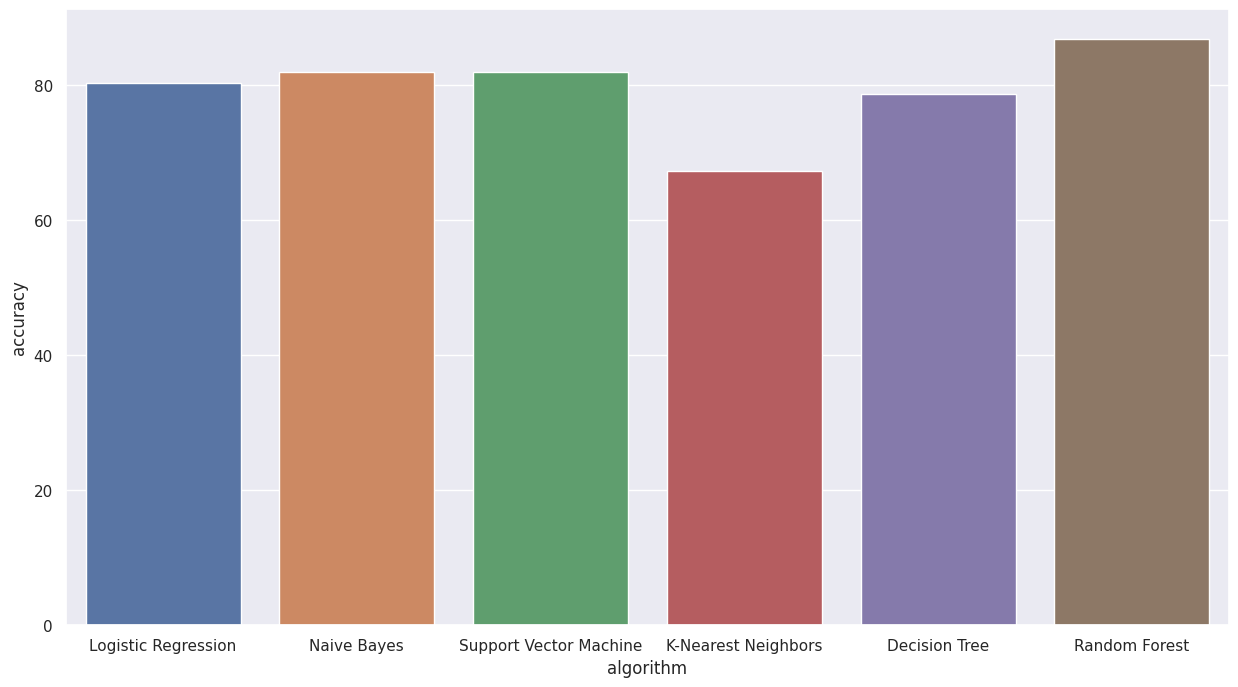

In [20]:
scores = [score_lr,score_nb,score_svm,score_knn,score_dt,score_rf]
algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machine","K-Nearest Neighbors","Decision Tree","Random Forest"] 

algo_data = pd.DataFrame({'algorithm': algorithms, 'accuracy': scores})

sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(x='algorithm', y='accuracy', data=algo_data)

## Joint Plot between Age and Sex

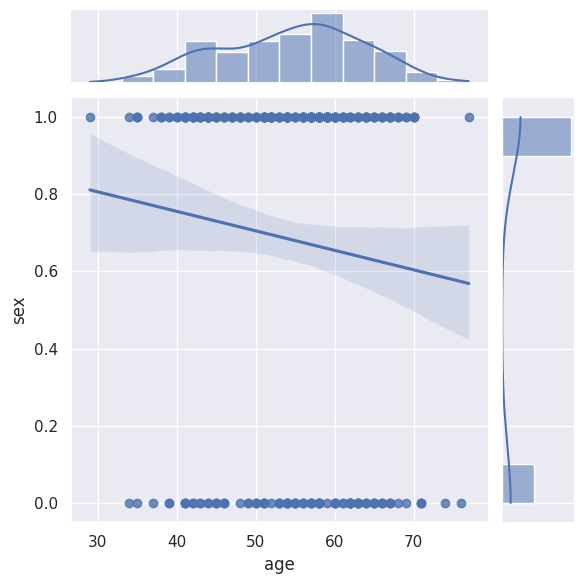

In [33]:
sns.jointplot(x='age', y='sex', data=data, kind='reg')

## Joint Plot between Age and Chest Pain

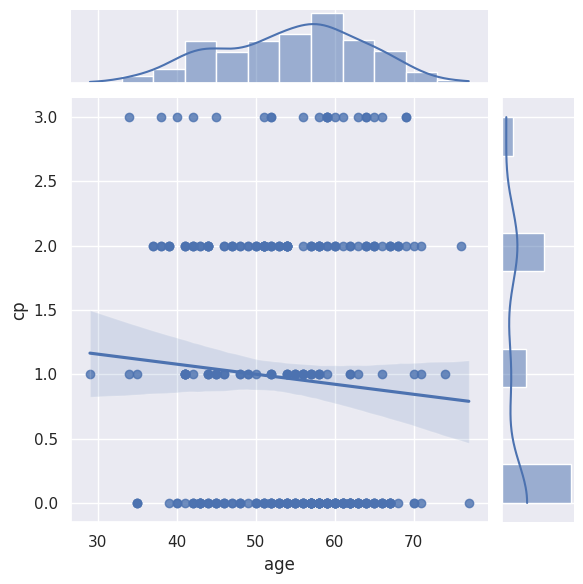

In [36]:
sns.jointplot(x='age', y='cp', data=data, kind='reg')

## Joint Plot between Age and Blood Pressure

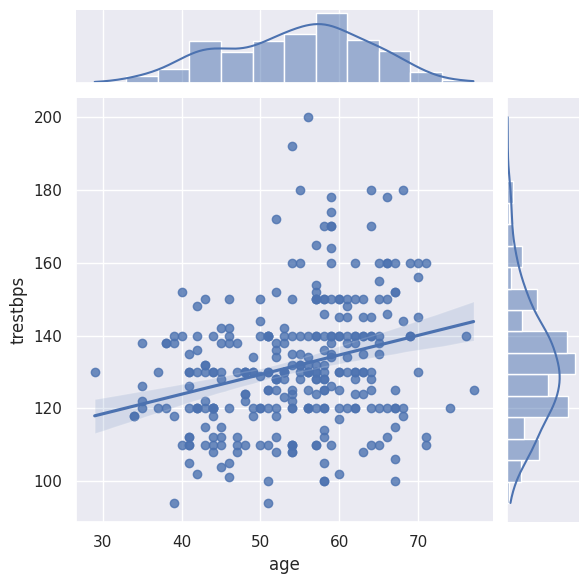

In [42]:
sns.jointplot(x='age', y='trestbps', data=data, kind='reg')

## Joint Plot between Age and Blood Sugar

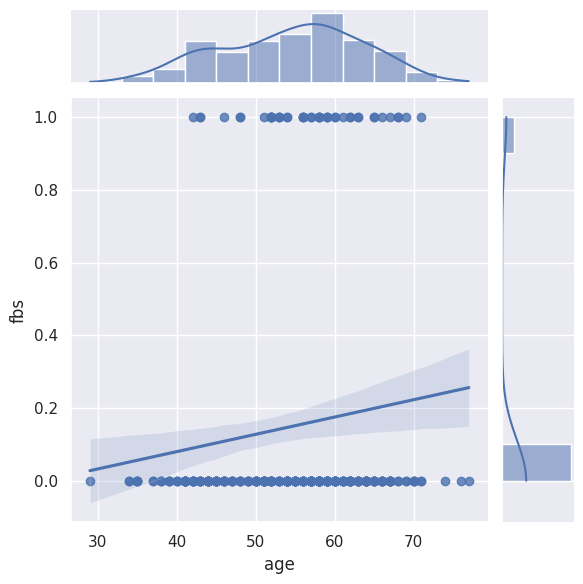

In [43]:
sns.jointplot(x='age', y='fbs', data=data, kind='reg')

## Joint Plot between Age and Cholesterol

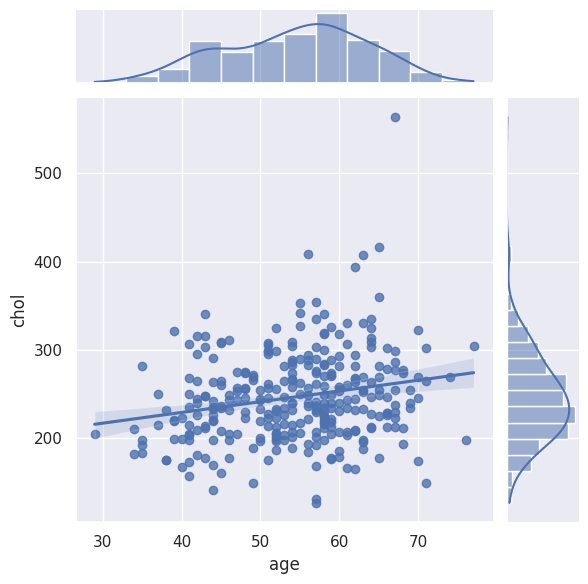

In [44]:
sns.jointplot(x='age', y='chol', data=data, kind='reg')